In [704]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [705]:
columns = ["Class","Age","Menopause","Tumor-size","inv-nodes","node-caps","deg-malig","breast","breast-quad","irradiat"]
df = pd.read_csv("data/breast-cancer.data",names = columns)
print(df)

                    Class    Age Menopause Tumor-size inv-nodes node-caps  \
0    no-recurrence-events  30-39   premeno      30-34       0-2        no   
1    no-recurrence-events  40-49   premeno      20-24       0-2        no   
2    no-recurrence-events  40-49   premeno      20-24       0-2        no   
3    no-recurrence-events  60-69      ge40      15-19       0-2        no   
4    no-recurrence-events  40-49   premeno        0-4       0-2        no   
..                    ...    ...       ...        ...       ...       ...   
281     recurrence-events  30-39   premeno      30-34       0-2        no   
282     recurrence-events  30-39   premeno      20-24       0-2        no   
283     recurrence-events  60-69      ge40      20-24       0-2        no   
284     recurrence-events  40-49      ge40      30-34       3-5        no   
285     recurrence-events  50-59      ge40      30-34       3-5        no   

     deg-malig breast breast-quad irradiat  
0            3   left    left_

In [706]:
df.head()

,Class,Age,Menopause,Tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [707]:
df.dtypes

Class          object
Age            object
Menopause      object
Tumor-size     object
inv-nodes      object
node-caps      object
deg-malig       int64
breast         object
breast-quad    object
irradiat       object
dtype: object

In [708]:
df.shape

(286, 10)

In [709]:
df.head(185)

,Class,Age,Menopause,Tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
180,no-recurrence-events,40-49,premeno,35-39,0-2,yes,3,right,left_up,yes
181,no-recurrence-events,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes
182,no-recurrence-events,40-49,premeno,25-29,0-2,no,1,right,left_low,yes
183,no-recurrence-events,50-59,ge40,30-34,9-11,?,3,left,left_up,yes


In [710]:
print((df == '?').sum())

Class          0
Age            0
Menopause      0
Tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
dtype: int64


In [711]:
df.replace('?',np.nan ,inplace=True)
print(df.isnull().sum())

Class          0
Age            0
Menopause      0
Tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
dtype: int64


In [712]:
for col in df.columns:
    df[col].fillna(df[col].mode()[0],inplace=True)
print(df.isnull().sum())    

Class          0
Age            0
Menopause      0
Tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64


C:\Users\abhij\AppData\Local\Temp\ipykernel_18488\2321362737.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)
C:\Users\abhij\AppData\Local\Temp\ipykernel_18488\2321362737.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [713]:
for col in df.select_dtypes(include=['object']).columns:
    unique_vals = df[col].dropna().unique()
    print(f"Column '{col}' ({len(unique_vals)} unique values):")
    print(unique_vals)
    print("-" * 10)

Column 'Class' (2 unique values):
['no-recurrence-events' 'recurrence-events']
----------
Column 'Age' (6 unique values):
['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
----------
Column 'Menopause' (3 unique values):
['premeno' 'ge40' 'lt40']
----------
Column 'Tumor-size' (11 unique values):
['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
----------
Column 'inv-nodes' (7 unique values):
['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
----------
Column 'node-caps' (2 unique values):
['no' 'yes']
----------
Column 'breast' (2 unique values):
['left' 'right']
----------
Column 'breast-quad' (5 unique values):
['left_low' 'right_up' 'left_up' 'right_low' 'central']
----------
Column 'irradiat' (2 unique values):
['no' 'yes']
----------


<function matplotlib.pyplot.show(close=None, block=None)>

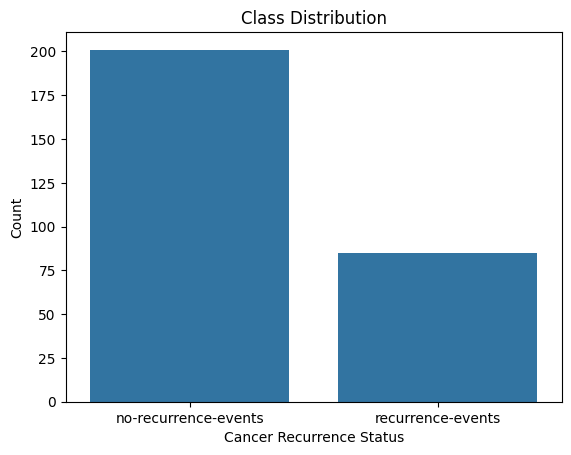

In [714]:
#visualization 1- class distribution
plt.Figure(figsize=(6,4))
sns.countplot(x='Class',data=df)
plt.title("Class Distribution")
plt.xlabel("Cancer Recurrence Status")
plt.ylabel("Count")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

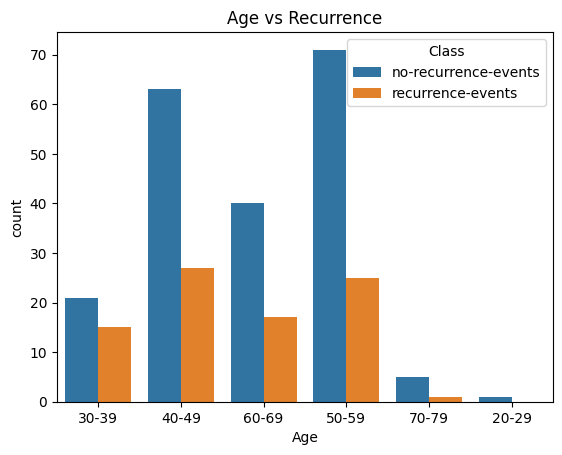

In [715]:
#age distribution
plt.Figure(figsize=(8,4))
sns.countplot(x = 'Age', hue='Class',data=df)
plt.title("Age vs Recurrence")
plt.show


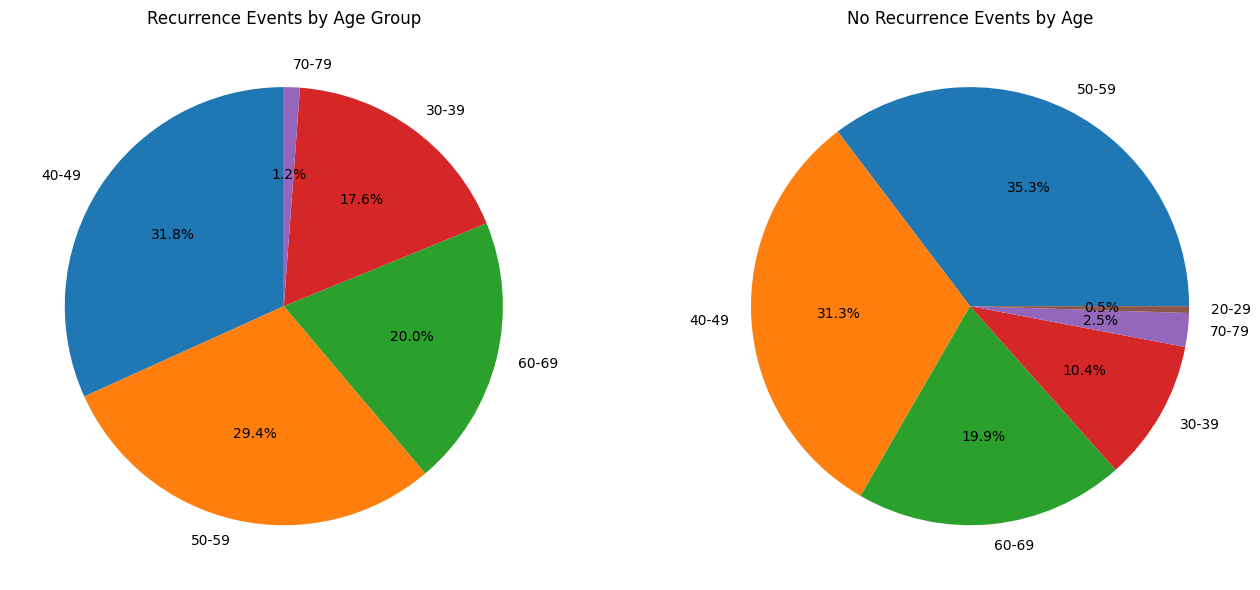

In [716]:
age_recurrence = df[df['Class']=='recurrence-events']['Age'].value_counts()
age_no_recurrence = df[df['Class']=='no-recurrence-events']['Age'].value_counts()
 #pie chart
[fig,axes] = plt.subplots(1,2,figsize=(14,6))
#for recurrence events
axes[0].pie(age_recurrence,labels = age_recurrence.index,autopct='%1.1f%%',startangle=90)
axes[0].set_title("Recurrence Events by Age Group")
#for no recurrence events
axes[1].pie(age_no_recurrence,labels= age_no_recurrence.index,autopct='%1.1f%%')
axes[1].set_title("No Recurrence Events by Age")
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

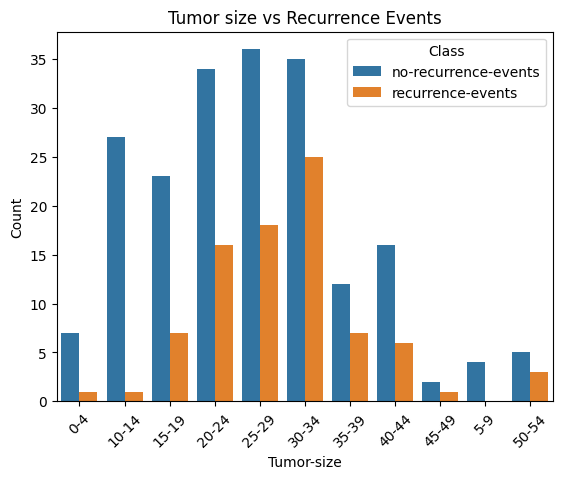

In [717]:
# Tumor vs Recurrence 
plt.Figure(figsize=(10,5))
sns.countplot(x='Tumor-size',hue='Class',data=df,order=sorted(df['Tumor-size'].unique()))
plt.title("Tumor size vs Recurrence Events")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

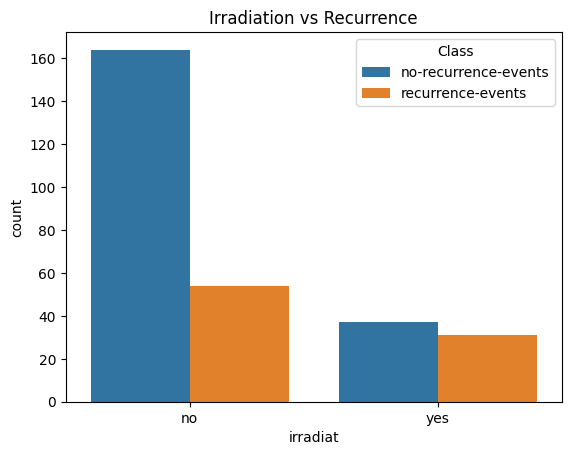

In [718]:
# Irradiation effect
plt.Figure(figsize=(6,4))
sns.countplot(x='irradiat',hue='Class', data=df)
plt.title("Irradiation vs Recurrence")
plt.show

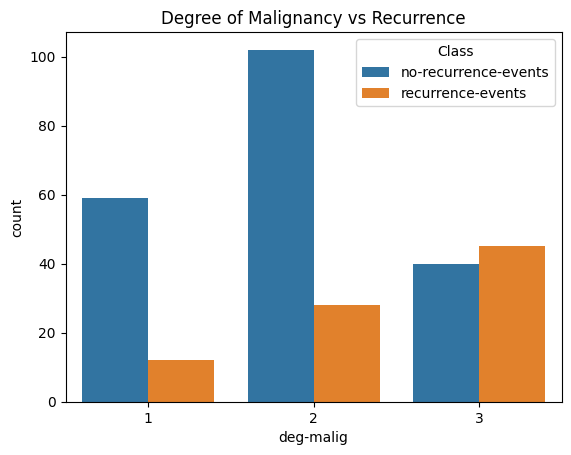

In [719]:
# Degree of Malignancy
plt.Figure(figsize=(6,4))
sns.countplot(x='deg-malig',hue='Class',data=df)
plt.title("Degree of Malignancy vs Recurrence")
plt.show()

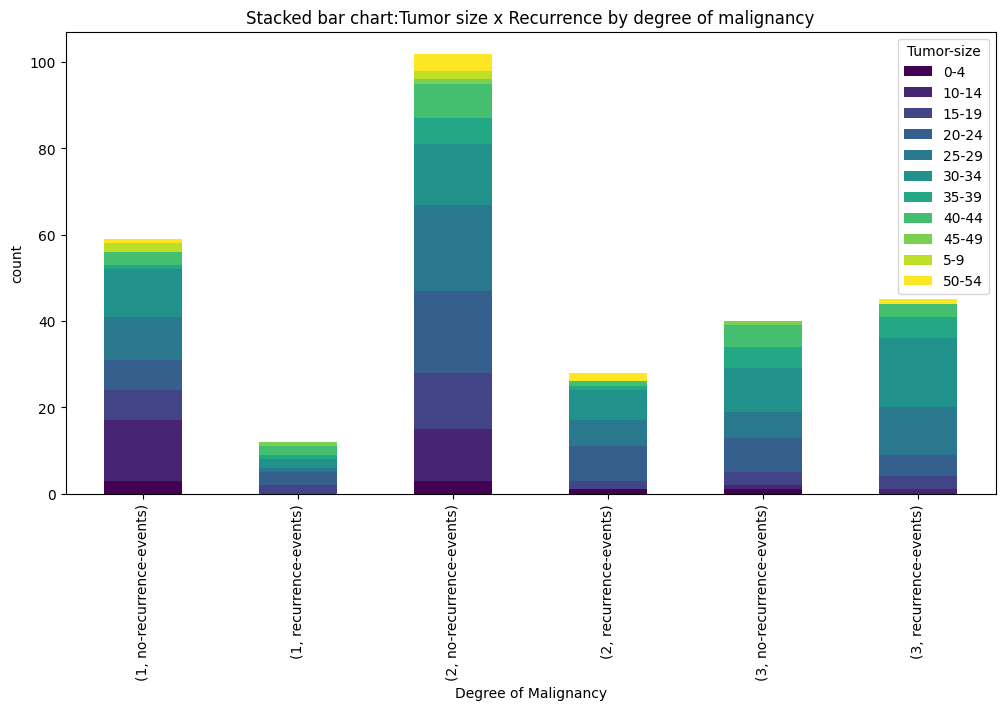

In [720]:
grouped = df.groupby(['deg-malig','Class','Tumor-size']).size().unstack(fill_value=0)
grouped.plot(kind='bar',stacked=True,figsize=(12,6),colormap='viridis')
plt.title("Stacked bar chart:Tumor size x Recurrence by degree of malignancy")
plt.xlabel("Degree of Malignancy")
plt.ylabel("count")
plt.legend(title="Tumor-size")
plt.show()

In [721]:
#traget variable
df['Class'] = df['Class'].map({'no-recurrence-events': 0,'recurrence-events': 1})
#binary features                              
df['node-caps'] = df['node-caps'].map({'no': 0,'yes':1})
df['irradiat'] = df['irradiat'].map({'no': 0,'yes': 1})
df['breast'] = df['breast'].map({'left':0,'right':1})
# print(df['node-caps'])
#enumerate
age_map = {val: i for i,val in enumerate(sorted(df['Age'].unique()))} 
tsize_map = {val:i for i ,val in enumerate(sorted(df['Tumor-size'].unique()))}
inv_nodes_map = {val: i for i ,val in enumerate(sorted(df['inv-nodes'].unique()))}

print(age_map)
print(tsize_map)
print(inv_nodes_map)

df['Age'] = df['Age'].map(age_map)
df['Tumor-size'] = df['Tumor-size'].map(tsize_map)
df['inv-nodes'] = df['inv-nodes'].map(inv_nodes_map)

#ensure deg-malig is treated as a number
df['deg-malig'] = pd.to_numeric(df['deg-malig'])
#one-hot
df_processed = pd.get_dummies(df,columns=['Menopause','breast-quad'],drop_first=True, dtype=int)
df_processed



{'20-29': 0, '30-39': 1, '40-49': 2, '50-59': 3, '60-69': 4, '70-79': 5}
{'0-4': 0, '10-14': 1, '15-19': 2, '20-24': 3, '25-29': 4, '30-34': 5, '35-39': 6, '40-44': 7, '45-49': 8, '5-9': 9, '50-54': 10}
{'0-2': 0, '12-14': 1, '15-17': 2, '24-26': 3, '3-5': 4, '6-8': 5, '9-11': 6}


,Class,Age,Tumor-size,inv-nodes,node-caps,deg-malig,breast,irradiat,Menopause_lt40,Menopause_premeno,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up
0,0,1,5,0,0,3,0,0,0,1,1,0,0,0
1,0,2,3,0,0,2,1,0,0,1,0,0,0,1
2,0,2,3,0,0,2,0,0,0,1,1,0,0,0
3,0,4,2,0,0,2,1,0,0,0,0,1,0,0
4,0,2,0,0,0,2,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,1,1,5,0,0,2,0,0,0,1,0,1,0,0
282,1,1,3,0,0,3,0,1,0,1,0,1,0,0
283,1,4,3,0,0,1,1,0,0,0,0,1,0,0
284,1,2,5,4,0,3,0,0,0,0,1,0,0,0


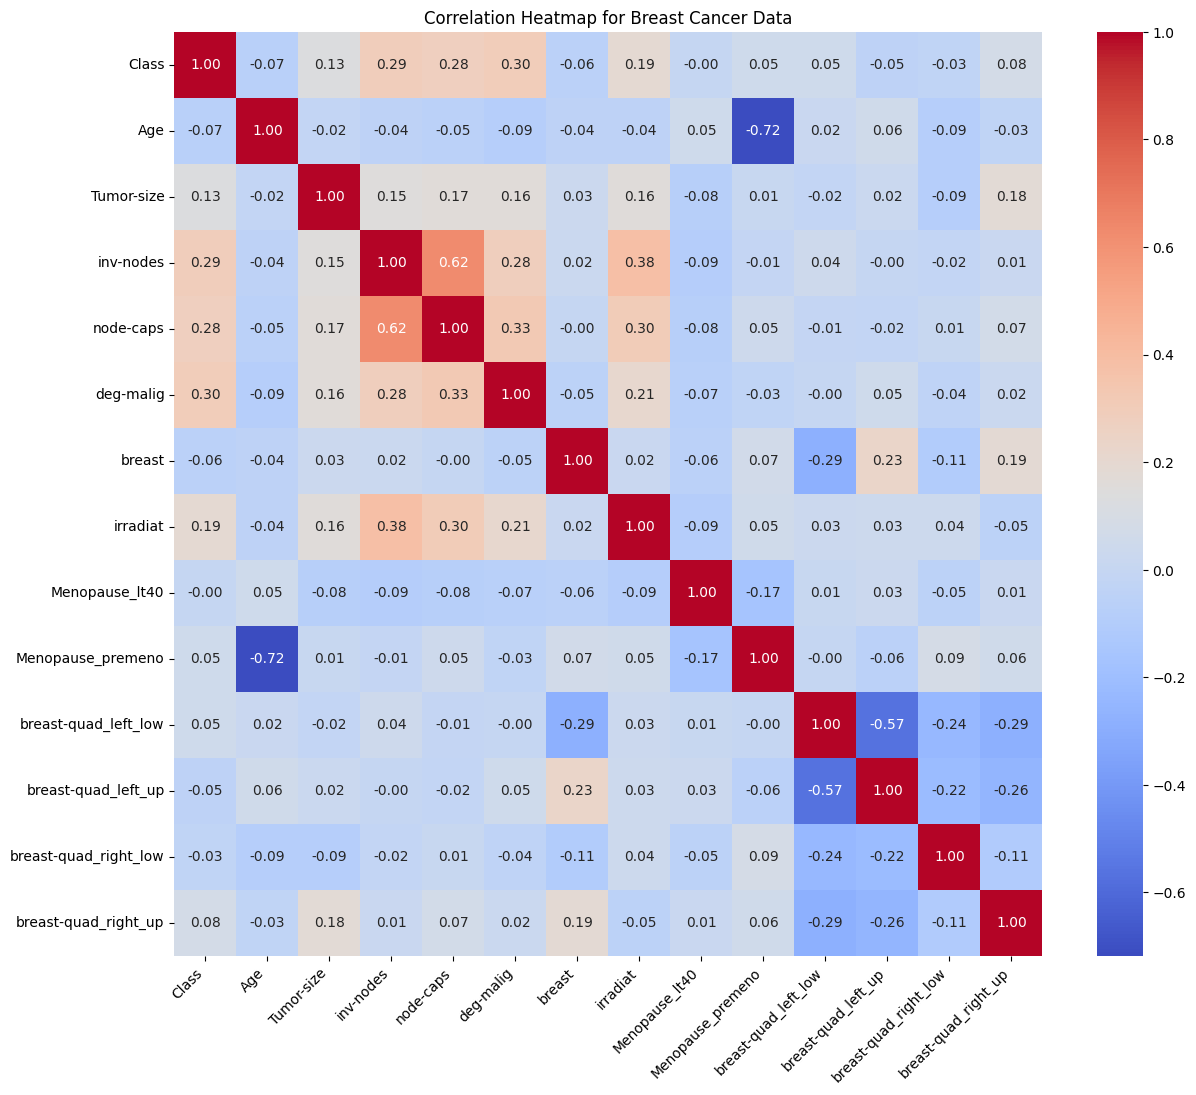

In [722]:
import seaborn as sns
import matplotlib.pyplot as plt



corr_matrix = df_processed.corr()


# Plot heatmap
plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap for Breast Cancer Data')
plt.xticks(rotation=45,ha ='right')
plt.yticks(rotation=0)
plt.show()
